**분류(classification)**

In [4]:
# 데이터, 시각화 관련 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# classification 관련 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# training set, test set 분리를 위한 라이브러리
from sklearn.model_selection import train_test_split 

# classification 평가를 위한 라이브러리
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# 붓꽃(Iris) 데이터 로딩
from sklearn.datasets import load_iris

**로지스틱회귀 간단한예제**

In [5]:
#training data

X = np.array([[-1, -1], [-2, -1], [-3,-2 ], [1,1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])

test_X = [[2, 2]]

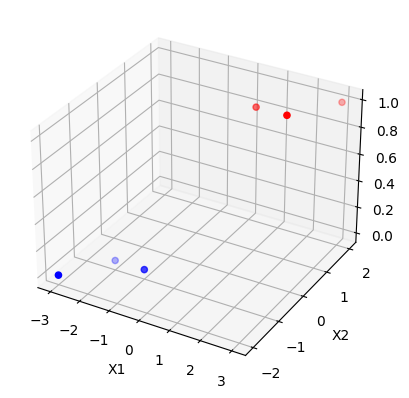

In [8]:
#그냥 위의 데이타 배치를 3d 그림으로 그려보는것임

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter([-1,-2,-3],[-1, -1, -2],[0, 0, 0], color ='blue') # -1 -1 이 클래서 0에 가기때문에 x = -1 y = -1 z = 0 으로 3d 표현
ax.scatter([1, 2, 3], [1, 1, 2], [1, 1, 1], color = 'red')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()


In [ ]:
clf_Ir = LogisticRegression() #sklearn에서 불러옴 붓꽃 분류
clf_Ir.fit(X,y)

LogisticRegression()

In [ ]:
clf_Ir.predict_proba(test_X)

array([[0.04891763, 0.95108237]])

In [ ]:
clf_Ir.predict(test_X)

array([1])

**같은 문제를 LDA로 분류해봄**

In [ ]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [ ]:
clf_lda.predict_proba(test_X)

array([[1.12535162e-07, 9.99999887e-01]])

In [ ]:
clf_lda.predict(test_X)

array([1])

**Heart 데이타 예제**



In [ ]:
# 데이터 loading
from google.colab import drive
drive.mount('/content/drive')

heart = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Heart.csv")

Mounted at /content/drive


In [ ]:
heart

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
#predictor와 response의 정의

X = heart[["Age", "Sex", "Chol"]]
y = heart["AHD"]

#training set, test set 구분

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

clf_heart = LinearDiscriminantAnalysis()
clf_heart.fit(X_train, y_train)
y_pred = clf_heart.predict(X_test)

In [ ]:
y_test

162     No
177    Yes
63      No
266    Yes
156    Yes
160     No
130     No
186     No
95     Yes
120    Yes
157    Yes
45     Yes
96     Yes
15      No
267    Yes
75      No
253     No
34      No
36     Yes
125     No
281     No
215     No
277     No
101     No
42      No
148     No
187    Yes
69     Yes
235    Yes
272    Yes
86      No
Name: AHD, dtype: object

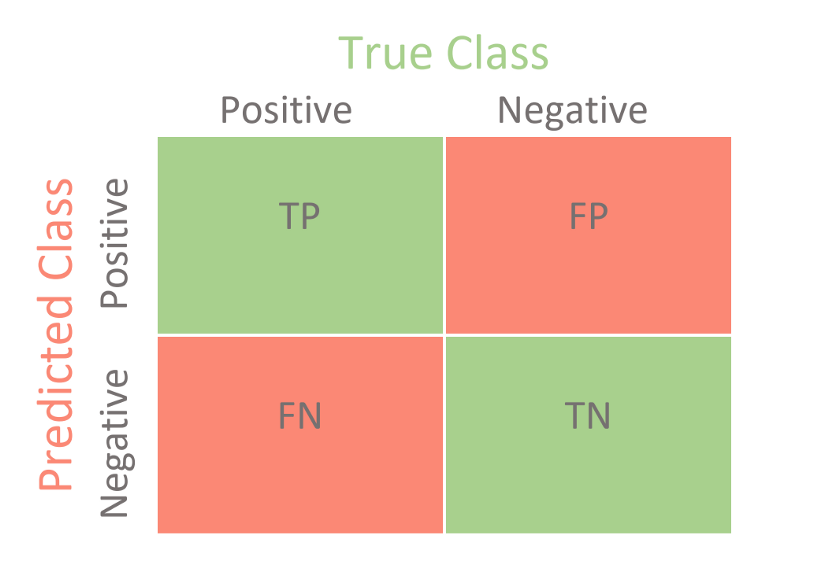

In [ ]:
#confusion matrix 생성
cm= confusion_matrix(y_test, y_pred)
cm

array([[12,  5],
       [ 4, 10]])

In [ ]:
# classification 결과  평가

# Precision: TP/(TP+FP)
print(precision_score(y_test, y_pred, average="macro"))

# Recall: TP/(TP+FN)
print(recall_score(y_test, y_pred, average="macro"))

# Accuracy: (TP+TN)/all
print(accuracy_score(y_test, y_pred))

0.7083333333333333
0.7100840336134454
0.7096774193548387


**붓꽃 데이타 예제** 로지스틱 멀티 클래스
굵은 텍스트
```
# 코드로 형식 지정됨
```



In [ ]:
X_iris,y_iris = load_iris(return_X_y=True) #return_X_y =true X,y형태로 나눠서 리턴받겠다

In [ ]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# training
clf = LogisticRegression(random_state=0).fit(X_iris, y_iris)

# 클래스 예측
clf.predict(X_iris)

#경고메세지 나옴, # 클래스 분류 비교해보기

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
clf.predict_proba(X_iris)

array([[9.81801790e-01, 1.81981959e-02, 1.43556907e-08],
       [9.71727348e-01, 2.82726221e-02, 3.00307256e-08],
       [9.85451821e-01, 1.45481667e-02, 1.22669829e-08],
       [9.76299555e-01, 2.37004051e-02, 3.95392775e-08],
       [9.85388794e-01, 1.46111946e-02, 1.18844386e-08],
       [9.70470231e-01, 2.95296954e-02, 7.31658657e-08],
       [9.86892099e-01, 1.31078812e-02, 1.98813481e-08],
       [9.76403999e-01, 2.35959736e-02, 2.74987214e-08],
       [9.79846470e-01, 2.01534997e-02, 3.05483138e-08],
       [9.69136281e-01, 3.08636877e-02, 3.15045384e-08],
       [9.76507990e-01, 2.34919910e-02, 1.91247633e-08],
       [9.75414682e-01, 2.45852747e-02, 4.36441157e-08],
       [9.74561901e-01, 2.54380777e-02, 2.13874589e-08],
       [9.91974148e-01, 8.02584827e-03, 3.87570298e-09],
       [9.88203900e-01, 1.17960975e-02, 2.79268763e-09],
       [9.86776508e-01, 1.32234792e-02, 1.27205635e-08],
       [9.88117663e-01, 1.18823279e-02, 9.15150624e-09],
       [9.81557981e-01, 1.84419

In [ ]:
clf.score(X_iris, y_iris)

0.9733333333333334